<a href="https://colab.research.google.com/github/Ppcat99/Data-Science_project_Parth-Patel/blob/main/Credit_Card_Fraud_Detection_ParthPatel_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Dataset
# Same thing with this one upload your creditcard.csv dataset than do run this code
from google.colab import files
upload = files.upload()
df = pd.read_csv('creditcard.csv')
df

TypeError: 'NoneType' object is not subscriptable

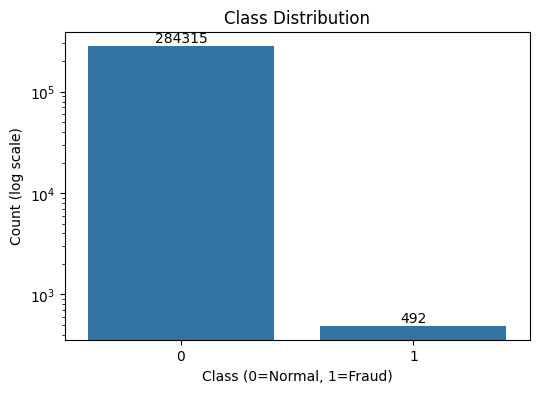

In [ ]:
plt.figure(figsize=(6,4))
class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count (log scale)')
plt.yscale('log')
for i, val in enumerate(class_counts.values):
  plt.text(i, val, str(val), ha='center', va='bottom')
plt.show()
# Normal is 284315 and fraud is 492

In [ ]:
# Separate features and target
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
# Single train-test split for both models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
# Train_test_split break the data into training and testing and mine was 60% and 40%
# X_train was the columns to train the model, X_test is to test the model predictions
# same thing with y_train which training the 0 or 1, and y_test was checking the
# model performance

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale features only for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest (no scaling needed)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate
print("RF classification report:")
print(classification_report(y_test, rf_pred))
print("RF confusion matrix:")
print(confusion_matrix(y_test, rf_pred))

# According to the random forest classification report 1 was fraud and 0 was valid
# So precision for 1 was 97%, recall was 70%, f1-score was 82%, 148 tranaction
# were fraud
# Also tells the same story with the confusion matrix which was 85292 tranaction
# were True Negative, 3 was false Positive, 44 was false negative, and 104 was
# true positive
# overall more are not fraud or valid.

RF classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.70      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

RF confusion matrix:
[[85292     3]
 [   44   104]]
